# Verifying Datasets




The top PCA components look weird for some Allen brain datasets. If this is how cell types were assigned, they should look okay.


I will load in a dataset and play around with PCA and UMAPs and figure out why the PCA components look wonky and do not separate out cell types. 


In [18]:
# System
import sys
sys.path.insert(0, '../analysis_scripts/')

# Math
import numpy as np
import torch
import pandas as pd
import pickle

# Plots
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams.update({'font.size': 20})
# colors
import matplotlib.colors as mcolors

# scvi
import anndata
import scanpy as sc


from calculate_metrics import *

In [3]:
# load in data

# open a file, where you stored the pickled data
# name = 'BVNB_20ct'
# data_dir = '../../data/simulated_data/'


# change name to look at different datasets 
name = 'B08_processed_hv'
data_dir = '../../data/allen/'

results_file = open(f'../../results/{name}_results_dict.pickle', 'rb')
data = 'not_simulated'

if data == 'simulated':
    simulated_params = np.load(f'../../data/simulated_data/{name}_params.npy')
else:
    simulated_params = None

results_dict = pickle.load(results_file)
results_file.close()

# read in adata
adata = anndata.read_loom(data_dir+f'{name}.loom')

if 'gene_name' in adata.var.columns:
    adata.var_names = adata.var['gene_name'].to_list()
    
# anndata objects for spliced and unspliced counts
adata_s = adata[:,adata.var['Spliced']==1].copy()    
adata_u = adata[:,adata.var['Spliced']==0].copy()

/usr/local/lib/python3.8/dist-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


------
## Histograms of counts per cell


Histograms of count per cell: raw, Cpk10 normalized, log1p normalized. 



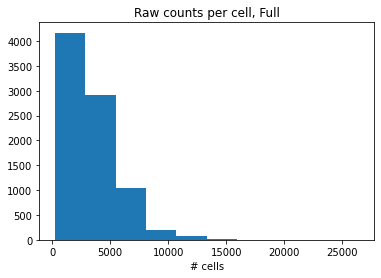

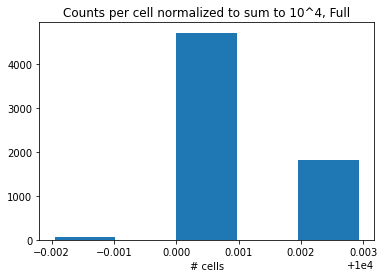

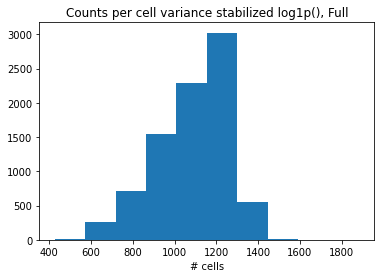

In [4]:
plt.hist(adata.X.sum(axis=1));
plt.title('Raw counts per cell, Full')
plt.xlabel('counts per cell')
plt.xlabel('# cells')
plt.show()

sc.pp.normalize_total(adata,target_sum=10**4)
plt.hist(adata.X.sum(axis=1));
plt.title('Counts per cell normalized to sum to 10^4, Full') 
plt.xlabel('depth - normalized counts per cell')
plt.xlabel('# cells')
plt.show()

sc.pp.log1p(adata)
plt.hist(adata.X.sum(axis=1));
plt.title('Counts per cell variance stabilized log1p(), Full') 
plt.xlabel('log1p ( depth - normalized counts per cell) ')
plt.xlabel('# cells')
plt.show()

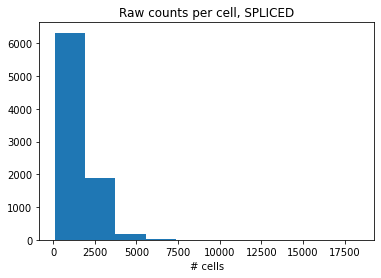

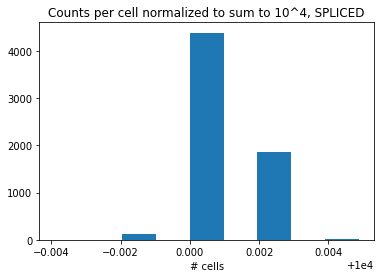

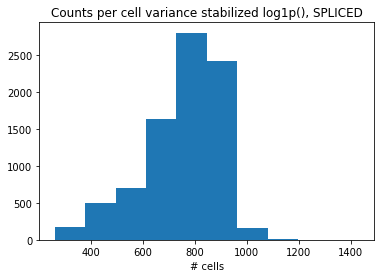

In [5]:
plt.hist(adata_s.X.sum(axis=1));
plt.title('Raw counts per cell, SPLICED')
plt.xlabel('counts per cell')
plt.xlabel('# cells')
plt.show()

sc.pp.normalize_total(adata_s,target_sum=10**4)
plt.hist(adata_s.X.sum(axis=1));
plt.title('Counts per cell normalized to sum to 10^4, SPLICED') 
plt.xlabel('depth - normalized counts per cell')
plt.xlabel('# cells')
plt.show()

sc.pp.log1p(adata_s)
plt.hist(adata_s.X.sum(axis=1));
plt.title('Counts per cell variance stabilized log1p(), SPLICED') 
plt.xlabel('log1p ( depth - normalized counts per cell) ')
plt.xlabel('# cells')
plt.show()

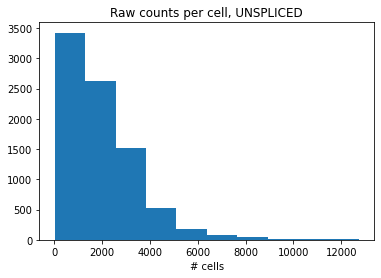

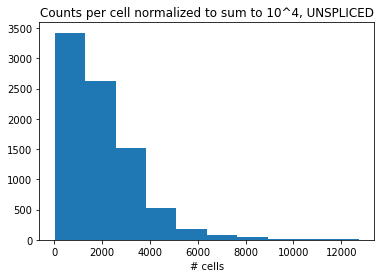

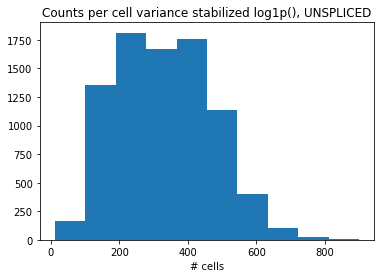

In [6]:
plt.hist(adata_u.X.sum(axis=1));
plt.title('Raw counts per cell, UNSPLICED')
plt.xlabel('counts per cell')
plt.xlabel('# cells')
plt.show()

sc.pp.normalize_total(adata_s,target_sum=10**4)
plt.hist(adata_u.X.sum(axis=1));
plt.title('Counts per cell normalized to sum to 10^4, UNSPLICED') 
plt.xlabel('depth - normalized counts per cell')
plt.xlabel('# cells')
plt.show()

sc.pp.log1p(adata_u)
plt.hist(adata_u.X.sum(axis=1));
plt.title('Counts per cell variance stabilized log1p(), UNSPLICED') 
plt.xlabel('log1p ( depth - normalized counts per cell) ')
plt.xlabel('# cells')
plt.show()

--------



# Manual PCA


First, manual PCA. 

Raw data, depth-normalized, and log1p (depth-normalized) for full, spliced, unspliced. 


Plot top 2 PCA components. 

In [7]:
# manual pca
from sklearn.decomposition import PCA

In [59]:
# color dictionary

colors = list(mcolors.CSS4_COLORS.keys())
cell_types = adata.obs['Cell Type']

#cell_range = range(len(cell_types.unique())) * 3
cell_dict = {cell : colors[i*5+3] for i,cell in enumerate(cell_types.unique())}
cluster_colors = np.array([cell_dict[ct] for ct in cell_types])

/usr/local/lib/python3.8/dist-packages/scikit_learn-1.0.1-py3.8-linux-x86_64.egg/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


(8424, 40)


/usr/local/lib/python3.8/dist-packages/scikit_learn-1.0.1-py3.8-linux-x86_64.egg/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


Text(0.5, 0, 'PCA 2')

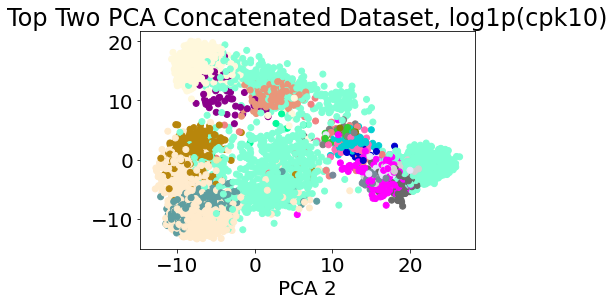

In [60]:
# declare PCA object
pca = PCA(n_components=40)
pca.fit(adata.X.todense())

pca_full = pca.transform(adata.X.todense())
print(pca_full.shape)

plt.scatter(pca_full[:,0],pca_full[:,1],color=cluster_colors)
plt.title('Top Two PCA Concatenated Dataset, log1p(cpk10)')
plt.xlabel('PCA 1')
plt.xlabel('PCA 2')

/usr/local/lib/python3.8/dist-packages/scikit_learn-1.0.1-py3.8-linux-x86_64.egg/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/scikit_learn-1.0.1-py3.8-linux-x86_64.egg/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


Text(0.5, 0, 'PCA 2')

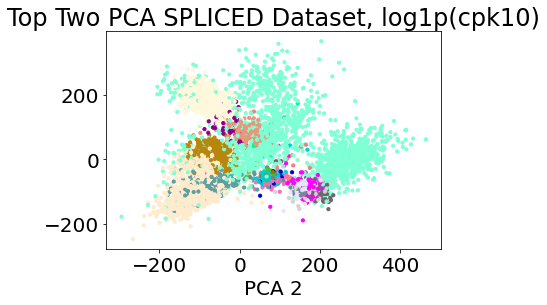

In [65]:
# declare PCA object
pca_s = PCA(n_components=40)
pca_s.fit(adata_s.X.todense())

pca_s = pca_s.transform(adata_s.X.todense())


plt.scatter(pca_s[:,0],pca_s[:,1],color=cluster_colors,s = 10 )
plt.title('Top Two PCA SPLICED Dataset, log1p(cpk10)')
plt.xlabel('PCA 1')
plt.xlabel('PCA 2')

/usr/local/lib/python3.8/dist-packages/scikit_learn-1.0.1-py3.8-linux-x86_64.egg/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/scikit_learn-1.0.1-py3.8-linux-x86_64.egg/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


Text(0.5, 0, 'PCA 2')

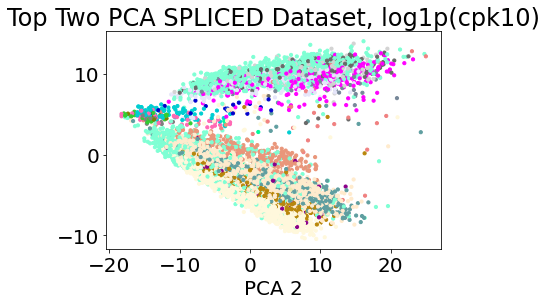

In [64]:
# declare PCA object
pca_u = PCA(n_components=40)
pca_u.fit(adata_u.X.todense())

pca_u = pca_u.transform(adata_u.X.todense())


plt.scatter(pca_u[:,0],pca_u[:,1],color=cluster_colors,s = 10)
plt.title('Top Two PCA SPLICED Dataset, log1p(cpk10)')
plt.xlabel('PCA 1')
plt.xlabel('PCA 2')

### Scanpy PCA